## Assignment No.: (4)

### Canonical partition function of n fermions distributed in N levels :

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def canonical_partition_function(n, N, beta):
    E_level = [k * beta for k in range(1, N + 1)]
    combinations = itertools.combinations(E_level, n)
    partition_function = sum([sum(np.exp(-beta*E) for E in combination) for combination in combinations])
    return partition_function

def U(n, N, beta):
    partition_function = canonical_partition_function(n, N, beta)
    E_level = [k * beta for k in range(1, N + 1)]
    internal_energy = -sum([E*np.exp(-beta*E) for E in E_level]) / partition_function
    return internal_energy

def Cv(n, N, beta):
    partition_function = canonical_partition_function(n, N, beta)
    E_level = [k * beta for k in range(1, N + 1)]
    internal_energy = U(n, N, beta)
    specific_heat = (beta**2)*(sum([E**2 * np.exp(-beta*E) for E in E_level]) / partition_function - internal_energy**2)
    return specific_heat

def F(n, N, beta):
    partition_function = canonical_partition_function(n, N, beta)
    free_energy = -np.log(partition_function) / beta
    return free_energy

def S(n, N, beta):
    internal_energy = U(n, N, beta)
    free_energy = F(n, N, beta)
    entropy = (internal_energy - free_energy) / beta
    return entropy

def delta_E(n, N, beta):
    specific_heat = Cv(n, N, beta)
    energy_fluctuation = np.sqrt(specific_heat * (beta ** 2))
    return energy_fluctuation

n = 2
N = 4
beta = 1.0

internal_energy = U(n, N, beta)
specific_heat = Cv(n, N, beta)
free_energy = F(n, N, beta)
entropy = S(n, N, beta)
energy_fluctuation = delta_E(n, N, beta)

print(f"Internal Energy (U): {internal_energy:.2f} Joules")
print(f"Specific Heat (Cv): {specific_heat:.2f} J/K")
print(f"Free Energy (F): {free_energy:.2f} Joules")
print(f"Entropy (S): {entropy:.2f} J/K")
print(f"Energy Fluctuation (ΔE): {energy_fluctuation:.2f} Joules")


Internal Energy (U): -0.50 Joules
Specific Heat (Cv): 0.71 J/K
Free Energy (F): -0.54 Joules
Entropy (S): 0.04 J/K
Energy Fluctuation (ΔE): 0.84 Joules


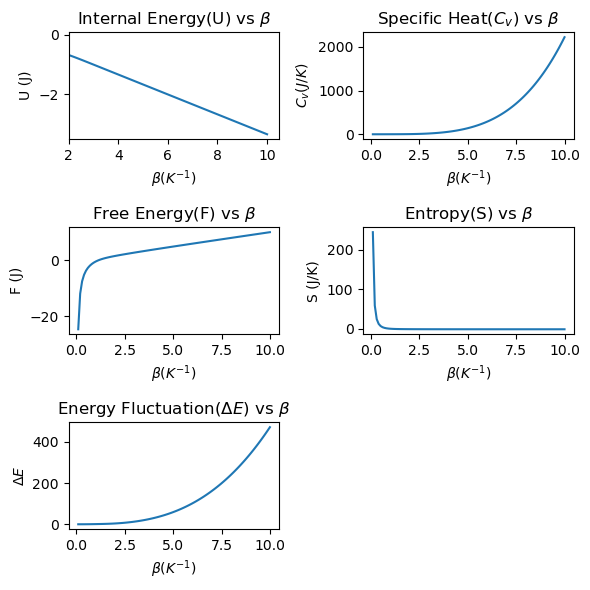

In [12]:
beta_values = np.linspace(0.1, 10.0, 100)

U_values = [U(n, N, b) for b in beta_values]
Cv_values = [Cv(n, N, b) for b in beta_values]
F_values = [F(n, N, b) for b in beta_values]
S_values = [S(n, N, b) for b in beta_values]
delta_E_values = [delta_E(n, N, b) for b in beta_values]


plt.figure(figsize=(6, 6))
plt.subplot(3, 2, 1)
plt.plot(beta_values, U_values)
plt.xlabel(r'$\beta (K^{-1})$')
plt.ylabel('U (J)')
plt.title(r'Internal Energy(U) vs $\beta$')
plt.xlim(2,10.5)

plt.subplot(3, 2, 2)
plt.plot(beta_values, Cv_values)
plt.xlabel(r'$\beta (K^{-1})$')
plt.ylabel(r'$C_v (J/K)$')
plt.title(r'Specific Heat($C_v$) vs $\beta$')

plt.subplot(3, 2, 3)
plt.plot(beta_values, F_values)
plt.xlabel(r'$\beta (K^{-1})$')
plt.ylabel('F (J)')
plt.title(r'Free Energy(F) vs $\beta$')

plt.subplot(3, 2, 4)
plt.plot(beta_values, S_values)
plt.xlabel(r'$\beta (K^{-1})$')
plt.ylabel('S (J/K)')
plt.title(r'Entropy(S) vs $\beta$')

plt.subplot(3, 2, 5)
plt.plot(beta_values, delta_E_values)
plt.xlabel(r'$\beta (K^{-1})$')
plt.ylabel(r'$\Delta E$')
plt.title(r'Energy Fluctuation($\Delta E$) vs $\beta$')

plt.tight_layout()
plt.show()

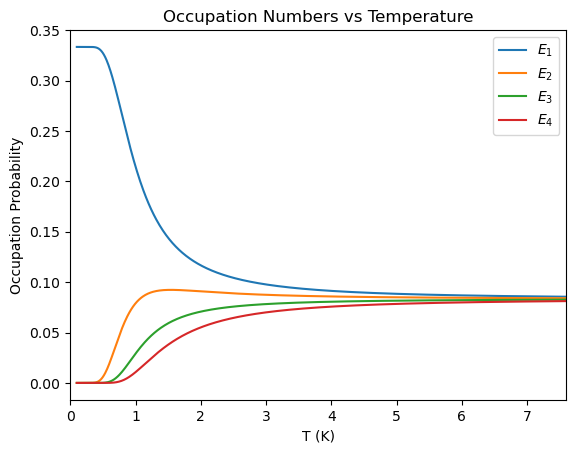

In [4]:
# Occupation numbers of the states variation with temperature:

def occupation_probability(n, N, beta):
    partition_function = canonical_partition_function(n, N, beta)
    E_level = [k * beta for k in range(1, N + 1)]
    prob = [np.exp(-beta * E) / partition_function for E in E_level]
    return prob

def occupation(n, N, T_range):
    beta_values = [1 / T for T in T_range]
    occupation_numbers = []
    for beta in beta_values:
        occupation_probabilities = occupation_probability(n, N, beta)
        occupation_numbers.append(occupation_probabilities)

    occupation_numbers = np.array(occupation_numbers).T

    plt.figure()
    for i in range(N):
        plt.plot(T_range, occupation_numbers[i], label=r"$E_{}$".format(i+1))

    plt.xlabel("T (K)")
    plt.ylabel("Occupation Probability")
    plt.title("Occupation Numbers vs Temperature")
    plt.legend()
    plt.xlim(0,7.6)
    plt.show()

n = 2
N = 4
T_range = np.linspace(0.1, 10, 1000) 

occupation(n, N, T_range)